In [2]:
!pip install tensorflow

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [18]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
# resize images to below size
input_img_size = [224, 224]

train_path = "/content/drive/MyDrive/dl/car brand classification/Datasets/Train"
test_path = "/content/drive/MyDrive/dl/car brand classification/Datasets/Test"

In [13]:
resnet = ResNet50(input_shape= input_img_size + [3], weights='imagenet', include_top= False)

In [14]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
# dont' train existing weights
for layer in resnet.layers:
  layer.trainable = False;

In [22]:
folders = glob("/content/drive/MyDrive/dl/car brand classification/Datasets/Train/*")

In [23]:
folders

['/content/drive/MyDrive/dl/car brand classification/Datasets/Train/audi',
 '/content/drive/MyDrive/dl/car brand classification/Datasets/Train/lamborghini',
 '/content/drive/MyDrive/dl/car brand classification/Datasets/Train/mercedes']

In [28]:
# adding layers
x = Flatten()(resnet.output)

In [29]:
prediction = Dense(len(folders), activation="softmax")(x)

In [31]:
model = Model(resnet.input, prediction)

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [33]:
# tell the model - what cost and optimization methods to use
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics= ['accuracy']
)

In [34]:
# rescaling images and perfoming augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255)

In [37]:
train_set = train_datagen.flow_from_directory(train_path, 
                                  batch_size=32,
                                  target_size=(224, 224),
                                  class_mode='categorical'
                                  )

Found 64 images belonging to 3 classes.


In [38]:
test_set = test_datagen.flow_from_directory(test_path, 
                                  batch_size=32,
                                  target_size=(224, 224),
                                  class_mode='categorical'
                                  )

Found 58 images belonging to 3 classes.


In [39]:
# training code

r = model.fit_generator(
    train_set,
    validation_data= test_set,
    epochs=50,
    steps_per_epoch= len(train_set),
    validation_steps= len(test_set)

)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 77s 64s/step - loss: 4.2316 - accuracy: 0.3125 - val_loss: 21.5354 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 37s 28s/step - loss: 14.0783 - accuracy: 0.3125 - val_loss: 7.0255 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 30s 21s/step - loss: 3.0553 - accuracy: 0.4531 - val_loss: 4.2457 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 29s 20s/step - loss: 7.2484 - accuracy: 0.3750 - val_loss: 3.9953 - val_accuracy: 0.4483
Epoch 5/50
2/2 [==============================] - 20s 14s/step - loss: 7.4257 - accuracy: 0.4375 - val_loss: 3.8755 - val_accuracy: 0.3448
Epoch 6/50
2/2 [==============================] - 20s 14s/step - loss: 5.2793 - accuracy: 0.4531 - val_loss: 2.2984 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 20s 14s/step - loss: 2.2185 - accuracy: 0.4844 - val_loss: 4.6646 - val_accuracy: 0.1724
Epoch 8/50
2/2 [=========

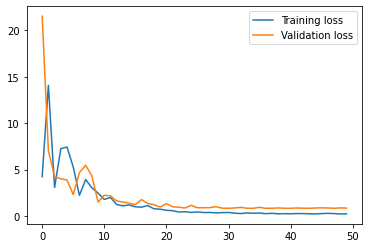

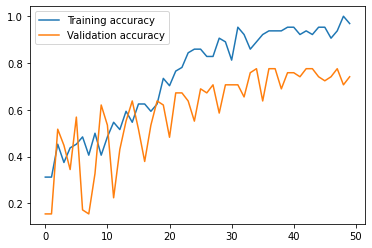

<Figure size 432x288 with 0 Axes>

In [40]:
plt.plot(r.history['loss'], label= 'Training loss')
plt.plot(r.history['val_loss'], label= 'Validation loss')
plt.legend()
plt.show()
plt.savefig('Loss')

plt.plot(r.history['accuracy'], label= 'Training accuracy')
plt.plot(r.history['val_accuracy'], label= 'Validation accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [41]:
model.save('/content/drive/MyDrive/dl/car brand classification/model_resnet50.h5') # saves trained model

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [42]:
y_pred = model.predict(test_set)

In [43]:
y_pred

array([[3.6884522e-01, 3.1855541e-01, 3.1259933e-01],
       [1.3215956e-01, 3.4682038e-01, 5.2102005e-01],
       [3.0483646e-02, 2.1356638e-01, 7.5595003e-01],
       [1.0343668e-01, 8.5270756e-01, 4.3855734e-02],
       [5.0342359e-02, 3.5480806e-04, 9.4930291e-01],
       [5.6115873e-03, 9.3691576e-01, 5.7472628e-02],
       [8.4644416e-03, 9.9011278e-01, 1.4227591e-03],
       [2.0570504e-02, 6.0768265e-01, 3.7174678e-01],
       [2.3614971e-02, 5.5350864e-01, 4.2287639e-01],
       [1.8325210e-02, 7.5037295e-01, 2.3130190e-01],
       [2.2445666e-03, 9.8856676e-01, 9.1885850e-03],
       [1.9348358e-01, 4.9118969e-01, 3.1532672e-01],
       [1.1610120e-02, 9.0438288e-01, 8.4006950e-02],
       [3.8523320e-02, 6.3074990e-03, 9.5516914e-01],
       [3.0206205e-02, 2.0680678e-01, 7.6298702e-01],
       [6.6612169e-02, 4.4321185e-01, 4.9017599e-01],
       [3.3072934e-05, 1.1363921e-03, 9.9883050e-01],
       [1.9362837e-02, 3.0592605e-03, 9.7757792e-01],
       [4.0138919e-02, 6.876

In [44]:
values = np.argmax(y_pred, axis=1)
values

array([0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1,
       1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2])

In [46]:
predictions = []
for i in values:
  if i == 0:
    predictions.append('audi')
  if i == 1:
    predictions.append('lamborgini')
  if i == 2:
    predictions.append('mercedes')

predictions

['audi',
 'mercedes',
 'mercedes',
 'lamborgini',
 'mercedes',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'audi',
 'mercedes',
 'audi',
 'lamborgini',
 'mercedes',
 'mercedes',
 'lamborgini',
 'mercedes',
 'mercedes',
 'mercedes',
 'lamborgini',
 'lamborgini',
 'audi',
 'mercedes',
 'lamborgini',
 'lamborgini',
 'mercedes',
 'lamborgini',
 'audi',
 'mercedes',
 'audi',
 'lamborgini',
 'lamborgini',
 'lamborgini',
 'audi',
 'lamborgini',
 'lamborgini',
 'mercedes',
 'mercedes',
 'audi',
 'mercedes',
 'mercedes',
 'mercedes',
 'lamborgini',
 'lamborgini',
 'mercedes',
 'mercedes']